# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2

# Enter the Data
Replace the data in the [ ] separated by commans for data.
Independent Variable : x
Dependent Variable   : y

A dataframe is created using Pandas for the Logistic Regressions Modeling. 

In [5]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,4,3,5,7,2,8,2,5,9])

df = pd.DataFrame({'x': x, 'y': y})

# Plot the Data with a Scatter Plot

### The following options can be replaced in the kind parameter for alternative graphs. 
    ‘line’ : line plot (default)
    ‘bar’ : vertical bar plot
    ‘barh’ : horizontal bar plot
    ‘hist’ : histogram
    ‘box’ : boxplot
    ‘kde’ : Kernel Density Estimation plot
    ‘density’ : same as ‘kde’
    ‘area’ : area plot
    ‘pie’ : pie plot
    ‘scatter’ : scatter plot
    ‘hexbin’ : hexbin plot

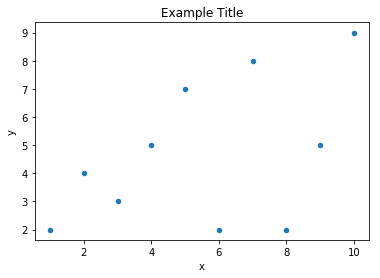

In [6]:
df.plot('x','y',kind='scatter',title='Example Title')
plt.show()

# Calculate P-values

# Redefine Logistic Regression from SKLearn to provide p-value

In [11]:
scores, pvalues = chi2(x, y)
pvalues

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (7,10) and (1,10) not aligned: 10 (dim 1) != 1 (dim 0)

In [ ]:
class LinearRegression(linear_model.LinearRegression):

    def __init__(self,*args,**kwargs):
        # *args is the list of arguments that might go into the LinearRegression object
        # that we don't know about and don't want to have to deal with. Similarly, **kwargs
        # is a dictionary of key words and values that might also need to go into the orginal
        # LinearRegression object. We put *args and **kwargs so that we don't have to look
        # these up and write them down explicitly here. Nice and easy.

        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False

        super(LinearRegression,self).__init__(*args,**kwargs)

    # Adding in t-statistics for the coefficients.
    def fit(self,x,y):
        # This takes in numpy arrays (not matrices). Also assumes you are leaving out the column
        # of constants.

        # Not totally sure what 'super' does here and why you redefine self...
        self = super(LinearRegression, self).fit(x,y)
        n, k = x.shape
        yHat = np.matrix(self.predict(x)).T

        # Change X and Y into numpy matricies. x also has a column of ones added to it.
        x = np.hstack((np.ones((n,1)),np.matrix(x)))
        y = np.matrix(y).T

        # Degrees of freedom.
        df = float(n-k-1)

        # Sample variance.     
        sse = np.sum(np.square(yHat - y),axis=0)
        self.sampleVariance = sse/df

        # Sample variance for x.
        self.sampleVarianceX = x.T*x

        # Covariance Matrix = [(s^2)(X'X)^-1]^0.5. (sqrtm = matrix square root.  ugly)
        self.covarianceMatrix = sc.linalg.sqrtm(self.sampleVariance[0,0]*self.sampleVarianceX.I)

        # Standard erros for the difference coefficients: the diagonal elements of the covariance matrix.
        self.se = self.covarianceMatrix.diagonal()[1:]

        # T statistic for each beta.
        self.betasTStat = np.zeros(len(self.se))
        for i in xrange(len(self.se)):
            self.betasTStat[i] = self.coef_[0,i]/self.se[i]

        # P-value for each beta. This is a two sided t-test, since the betas can be 
        # positive or negative.
        self.betasPValue = 1 - t.cdf(abs(self.betasTStat),df)